<h2>Tugas 2 Prak DS | Ibra Rizqy Siregar

<h4>1. Preprocessing

In [944]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import PowerTransformer
import time
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder



Import data

In [945]:
df = pd.read_csv('US_Heart_Patients.csv')

Check dataset dan tipe datanya

In [946]:
print(df.info())
print(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


Rename column agar rapi dan mudah diketik

In [947]:
df = df.rename(columns={
    'Gender': 'gender' ,
    'currentSmoker': 'current_smoker',
    'cigsPerDay': 'cigs_per_day',
    'BP Meds': 'bp_meds',
    'prevalentStroke': 'prev_stroke',
    'prevalentHyp': 'prev_hyp',
    'tot cholesterol': 'tot_chol',
    'Systolic BP': 'sys_bp',
    'Diastolic BP': 'dia_bp',
    'BMI': 'bmi',
    'heartRate': 'heart_rate',
    'Heart-Att' : 'heart_att',
    })
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          4232 non-null   object 
 1   age             4238 non-null   float64
 2   education       4130 non-null   float64
 3   current_smoker  4237 non-null   float64
 4   cigs_per_day    4209 non-null   float64
 5   bp_meds         4180 non-null   float64
 6   prev_stroke     4231 non-null   float64
 7   prev_hyp        4238 non-null   float64
 8   diabetes        4238 non-null   float64
 9   tot_chol        4180 non-null   float64
 10  sys_bp          4236 non-null   float64
 11  dia_bp          4235 non-null   float64
 12  bmi             4216 non-null   float64
 13  heart_rate      4236 non-null   float64
 14  glucose         3849 non-null   float64
 15  heart_att       4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


Check duplikat

In [948]:
df.duplicated().sum()

np.int64(0)

Check & delete irrelevant column
1. education: tidak terlalu jelas isinya yang berupa angka 1, 2, 3, dan 4. Juga tidak terlalu relevan dan membuat potensi adanya conundrum
2. current_smoker: karena sudah ada cigs_per_day yang sudah bisa menyatakan dia bukan perokok jika 0, maka current smoker redundant.
3. diabetes: karena sudah ada glucose yang sudah bisa menentukan tinggi level gula

In [949]:
df = df.drop(columns=['education', 'current_smoker', 'diabetes'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        4232 non-null   object 
 1   age           4238 non-null   float64
 2   cigs_per_day  4209 non-null   float64
 3   bp_meds       4180 non-null   float64
 4   prev_stroke   4231 non-null   float64
 5   prev_hyp      4238 non-null   float64
 6   tot_chol      4180 non-null   float64
 7   sys_bp        4236 non-null   float64
 8   dia_bp        4235 non-null   float64
 9   bmi           4216 non-null   float64
 10  heart_rate    4236 non-null   float64
 11  glucose       3849 non-null   float64
 12  heart_att     4240 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 430.8+ KB


Check null values
record yang memiliki null values tiga atau lebih akan dihapus langsung

In [950]:
df = df.dropna(thresh=df.shape[1] - 2)
print(df.isnull().sum())
df

gender            8
age               2
cigs_per_day     31
bp_meds          57
prev_stroke       6
prev_hyp          0
tot_chol         54
sys_bp            1
dia_bp            2
bmi              23
heart_rate        3
glucose         389
heart_att         0
dtype: int64


,gender,age,cigs_per_day,bp_meds,prev_stroke,prev_hyp,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,heart_att
0,Male,39.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,20.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,30.0,0.0,0.0,1.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,23.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48.0,20.0,NaN,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,Female,44.0,15.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,Female,52.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,Male,40.0,0.0,0.0,0.0,1.0,185.0,141.0,98.0,25.60,67.0,72.0,0


Check extreme values untuk menentukan isi null menggunakan median atau mean

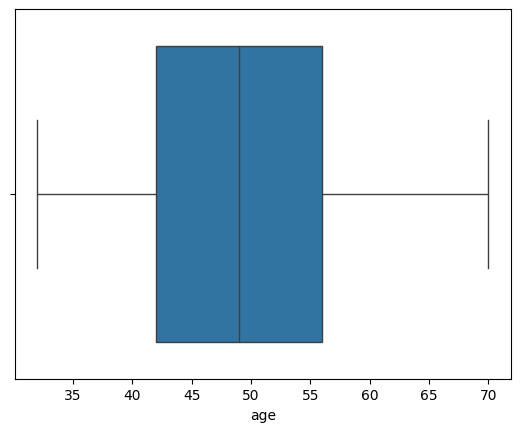

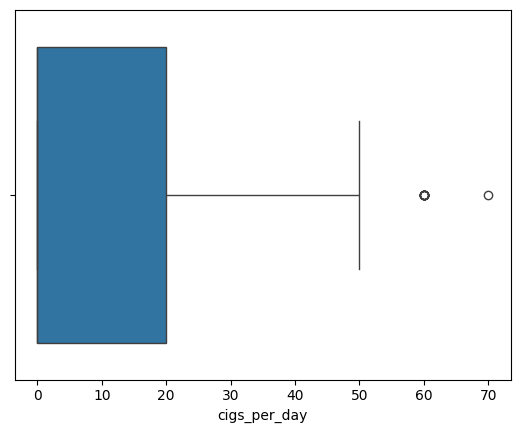

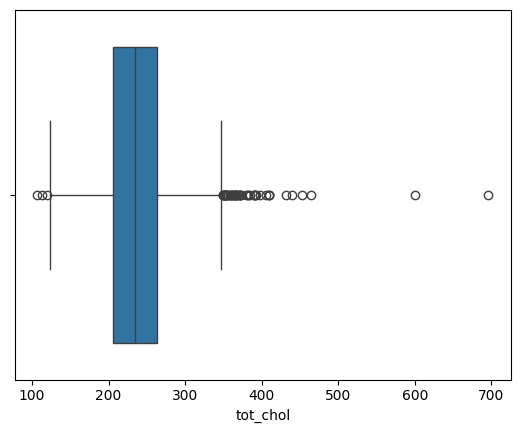

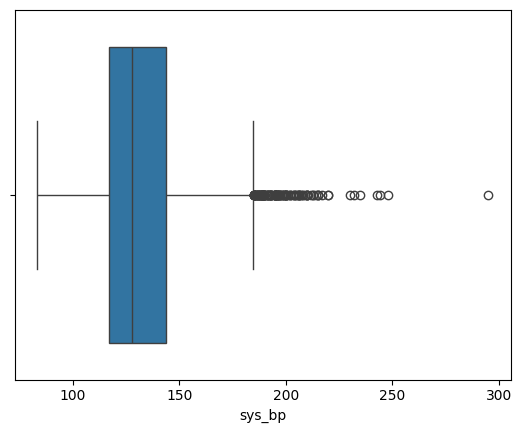

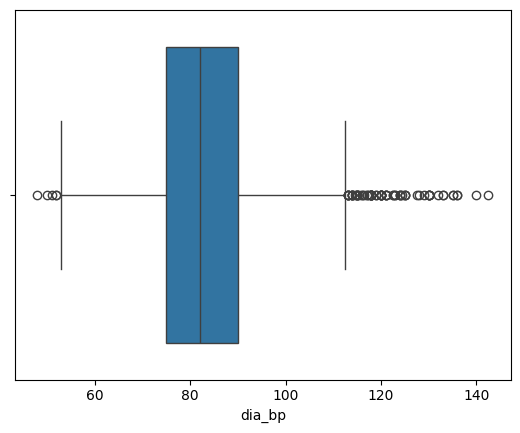

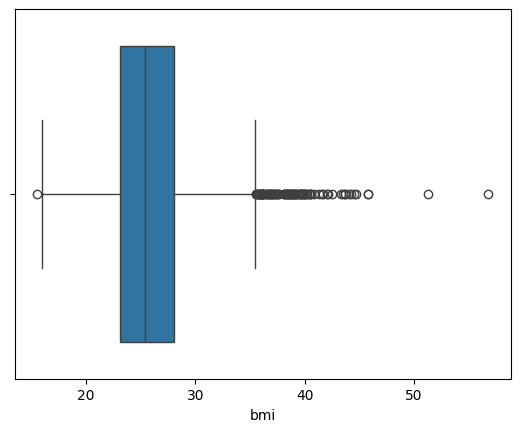

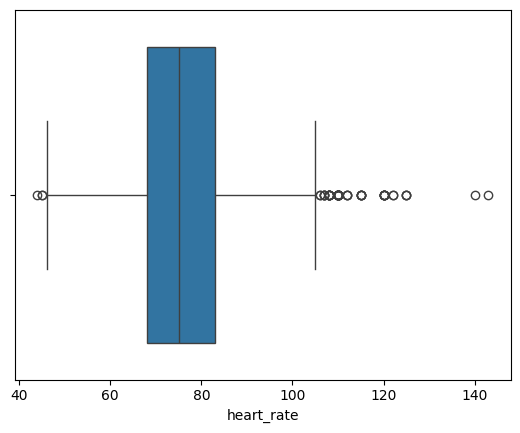

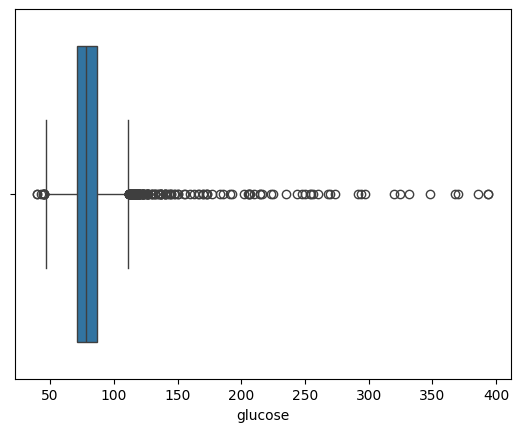

In [951]:
sns.boxplot(x=df['age'])
plt.show()
sns.boxplot(x=df['cigs_per_day'])
plt.show()
sns.boxplot(x=df['tot_chol'])
plt.show()
sns.boxplot(x=df['sys_bp'])
plt.show()
sns.boxplot(x=df['dia_bp'])
plt.show()
sns.boxplot(x=df['bmi'])
plt.show()
sns.boxplot(x=df['heart_rate'])
plt.show()
sns.boxplot(x=df['glucose'])
plt.show()

Isi null values
numerik akan diisi dengan mean jika tidak ada atau sedikit outlier, dan median jika banyak outlier

In [952]:
df.isnull().sum()

gender            8
age               2
cigs_per_day     31
bp_meds          57
prev_stroke       6
prev_hyp          0
tot_chol         54
sys_bp            1
dia_bp            2
bmi              23
heart_rate        3
glucose         389
heart_att         0
dtype: int64

In [953]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['age'] = df['age'].fillna(df['age'].mean())
df['cigs_per_day'] = df['cigs_per_day'].fillna(df['cigs_per_day'].mean())
df['bp_meds'] = df['bp_meds'].fillna(df['bp_meds'].mode()[0])
df['prev_stroke'] = df['prev_stroke'].fillna(df['prev_stroke'].mode()[0])
df['prev_hyp'] = df['prev_hyp'].fillna(df['prev_hyp'].mode()[0])
df['tot_chol'] = df['tot_chol'].fillna(df['tot_chol'].median())
df['sys_bp'] = df['sys_bp'].fillna(df['sys_bp'].median())
df['dia_bp'] = df['dia_bp'].fillna(df['dia_bp'].median())
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['heart_rate'] = df['heart_rate'].fillna(df['heart_rate'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df.isnull().sum()

gender          0
age             0
cigs_per_day    0
bp_meds         0
prev_stroke     0
prev_hyp        0
tot_chol        0
sys_bp          0
dia_bp          0
bmi             0
heart_rate      0
glucose         0
heart_att       0
dtype: int64

Check & ubah tipe data

In [954]:
print(df.info())
print(df)



<class 'pandas.core.frame.DataFrame'>
Index: 4232 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        4232 non-null   object 
 1   age           4232 non-null   float64
 2   cigs_per_day  4232 non-null   float64
 3   bp_meds       4232 non-null   float64
 4   prev_stroke   4232 non-null   float64
 5   prev_hyp      4232 non-null   float64
 6   tot_chol      4232 non-null   float64
 7   sys_bp        4232 non-null   float64
 8   dia_bp        4232 non-null   float64
 9   bmi           4232 non-null   float64
 10  heart_rate    4232 non-null   float64
 11  glucose       4232 non-null   float64
 12  heart_att     4232 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 462.9+ KB
None
      gender   age  cigs_per_day  bp_meds  prev_stroke  prev_hyp  tot_chol  \
0       Male  39.0           0.0      0.0          0.0       0.0     195.0   
1     Female  46.0         

In [955]:
df['age'] = df['age'].astype('int64')
df['cigs_per_day'] = df['cigs_per_day'].astype('int64')
df['bp_meds'] = df['bp_meds'].astype('int64')
df['prev_stroke'] = df['prev_stroke'].astype('int64')
df['prev_hyp'] = df['prev_hyp'].astype('int64')
df['tot_chol'] = df['tot_chol'].astype('int64')
df['heart_rate'] = df['heart_rate'].astype('int64')
df['glucose'] = df['glucose'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4232 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        4232 non-null   object 
 1   age           4232 non-null   int64  
 2   cigs_per_day  4232 non-null   int64  
 3   bp_meds       4232 non-null   int64  
 4   prev_stroke   4232 non-null   int64  
 5   prev_hyp      4232 non-null   int64  
 6   tot_chol      4232 non-null   int64  
 7   sys_bp        4232 non-null   float64
 8   dia_bp        4232 non-null   float64
 9   bmi           4232 non-null   float64
 10  heart_rate    4232 non-null   int64  
 11  glucose       4232 non-null   int64  
 12  heart_att     4232 non-null   int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 462.9+ KB


Data yang akan di binning adalah kolom glucose karena glucose extremely skewed kekanan

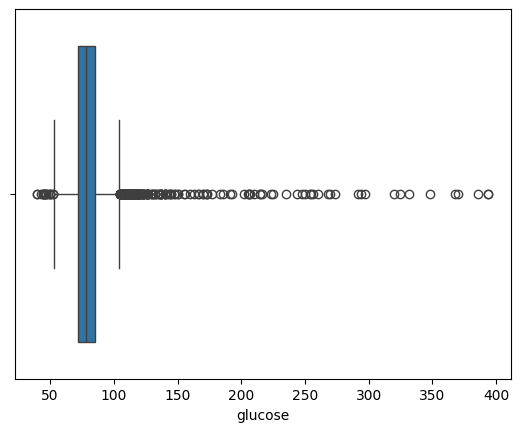

In [956]:
sns.boxplot(x=df['glucose'])
plt.show()

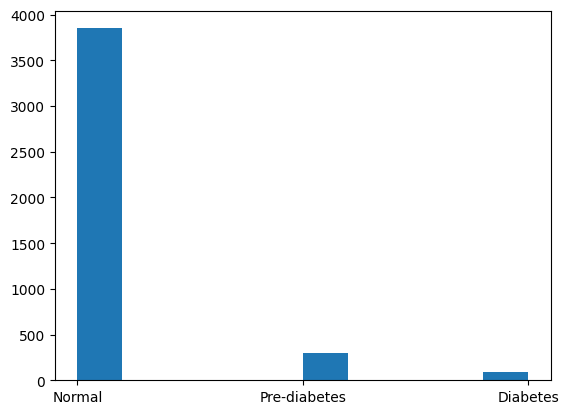

In [957]:
def diabetes(x):
    if x < 99:
        return 'Normal'
    elif x >= 99 and x < 126:
        return 'Pre-diabetes'
    elif x >= 126:
        return 'Diabetes'

df['diabetes'] = df['glucose'].apply(diabetes)
df['diabetes'] = df['diabetes'].astype('category')
plt.hist(df['diabetes'])
plt.show()

In [958]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4232 entries, 0 to 4239
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gender        4232 non-null   object  
 1   age           4232 non-null   int64   
 2   cigs_per_day  4232 non-null   int64   
 3   bp_meds       4232 non-null   int64   
 4   prev_stroke   4232 non-null   int64   
 5   prev_hyp      4232 non-null   int64   
 6   tot_chol      4232 non-null   int64   
 7   sys_bp        4232 non-null   float64 
 8   dia_bp        4232 non-null   float64 
 9   bmi           4232 non-null   float64 
 10  heart_rate    4232 non-null   int64   
 11  glucose       4232 non-null   int64   
 12  heart_att     4232 non-null   int64   
 13  diabetes      4232 non-null   category
dtypes: category(1), float64(3), int64(9), object(1)
memory usage: 467.1+ KB


<h2>2. Visualisasi

<h5>1. Scatter plot perbandingan antara Systolic Blood Pressure dengan Diastolic Blood Pressure

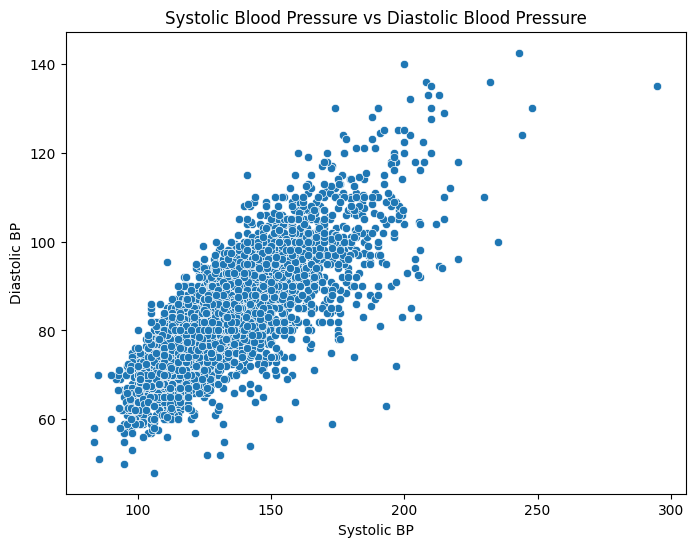

In [959]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sys_bp', y='dia_bp', data=df)
plt.title('Systolic Blood Pressure vs Diastolic Blood Pressure')
plt.xlabel('Systolic BP')
plt.ylabel('Diastolic BP')
plt.show()

Dari data diatas kita bisa menyimpulkan bahwa semakin tinggi systolic blood pressure, diastolic juga ikut meningkat

<h5>2. Histogram distribusi data dari BMI

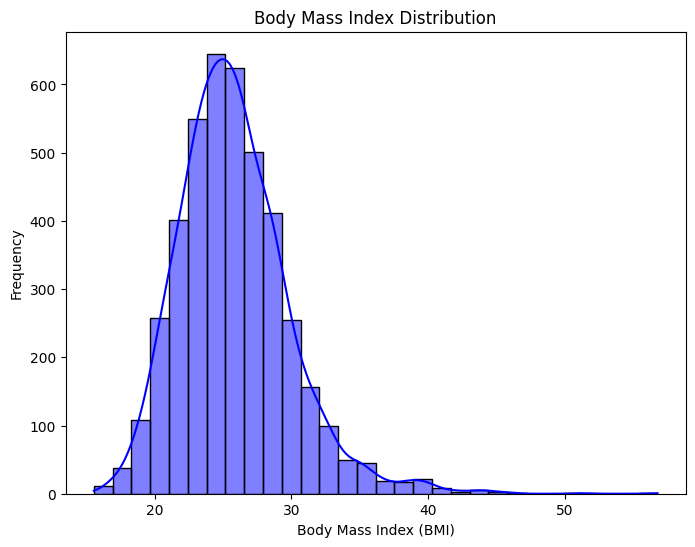

In [960]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='bmi', bins=30, kde=True, color='blue')
plt.title('Body Mass Index Distribution')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Frequency')
plt.show()

Dari data diatas kita bisa lihat bahwa mayoritas orang memiliki sekitar 20 sampai 30 BMI.

<h5>3. Boxplot distribusi data dari Umur

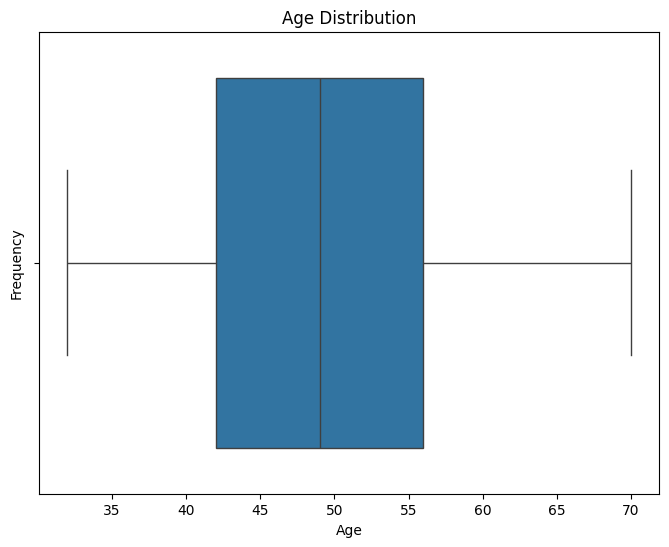

In [961]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='age')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Dari data diatas kita bisa menyimpulkan bahwa data umur memiliki median sekitar 48, Quantil 1 sekitar 44, dan Quantil 3 sekitar 57. Serta data tidak memiliki outlier

<h5>4. Heatmap korelasi antar variabel numerik

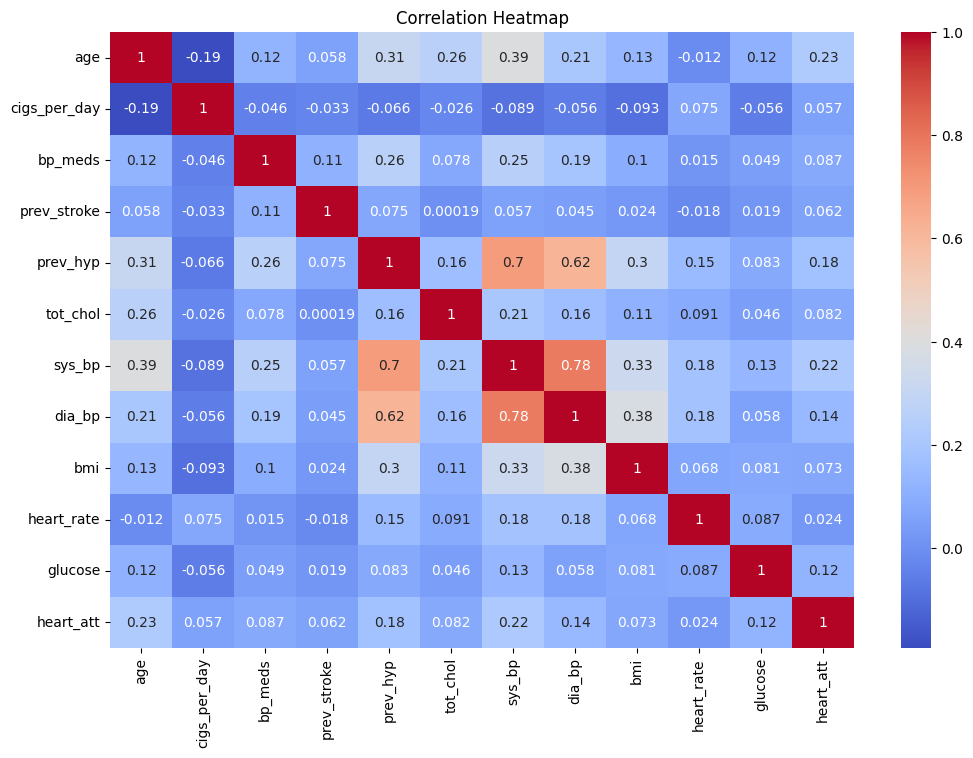

In [962]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 8)) 
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Dari data keatas kita bisa melihat bahwa diastolic blood pressure dan diastolic blood pressure sangat berkorelasi, begitu juga dengan prevalent hyp. Jika data ingin di training maka data yang memiliki korelasi tinggi lebih baik dihapus agar mengurangi noise dan redundant data.

<h5> 5. Perbandingan antara heart attack dengan cigs per day dan diabetes

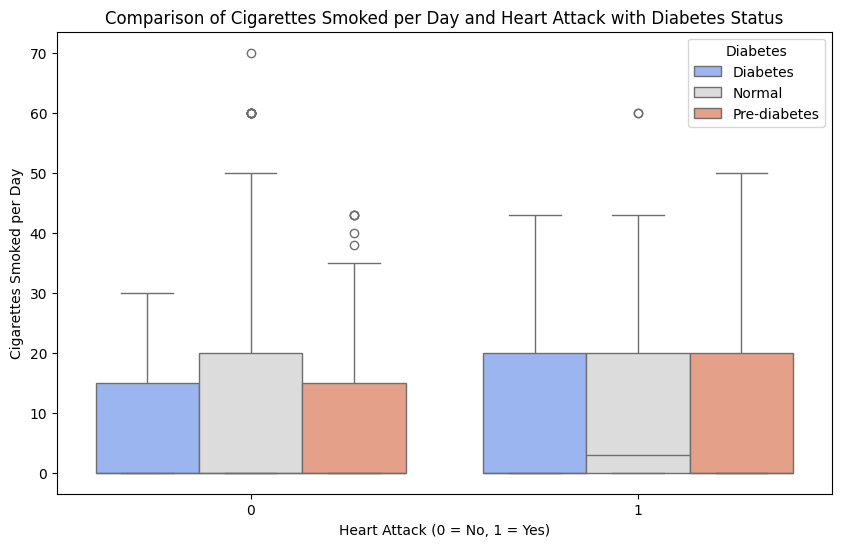

In [963]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a boxplot comparing 'cigs_per_day' for heart attack and no heart attack cases
sns.boxplot(x='heart_att', y='cigs_per_day', data=df, hue='diabetes', palette='coolwarm')

# Add labels and title
plt.title('Comparison of Cigarettes Smoked per Day and Heart Attack with Diabetes Status')
plt.xlabel('Heart Attack (0 = No, 1 = Yes)')
plt.ylabel('Cigarettes Smoked per Day')

# Show the plot
plt.legend(title='Diabetes')
plt.show()

Dari data diatas kita bisa melihat bahwa jumlah rokok perhari relevan dengan serangan jantung karena yang terkena serangan jantung itu yang lebih banyak mengonsumsi rokok walaupun tidak berbeda jauh dengan yang tidak terkena serangan jantung. Diabetes juga relevan karena orang yang terkena diabetes/prediabetes lebih banyak yang terkena serangan jantung daripada yang tidak kena.

<h3>3. Training

<h5>Training menggunakan Logistic Regression dan Random Forest dengan Hyperparameter Tuning

In [964]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4232 entries, 0 to 4239
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gender        4232 non-null   object  
 1   age           4232 non-null   int64   
 2   cigs_per_day  4232 non-null   int64   
 3   bp_meds       4232 non-null   int64   
 4   prev_stroke   4232 non-null   int64   
 5   prev_hyp      4232 non-null   int64   
 6   tot_chol      4232 non-null   int64   
 7   sys_bp        4232 non-null   float64 
 8   dia_bp        4232 non-null   float64 
 9   bmi           4232 non-null   float64 
 10  heart_rate    4232 non-null   int64   
 11  glucose       4232 non-null   int64   
 12  heart_att     4232 non-null   int64   
 13  diabetes      4232 non-null   category
dtypes: category(1), float64(3), int64(9), object(1)
memory usage: 467.1+ KB


<h5>- Tranformasi numerik

In [965]:
#drop data biner
df_numeric = df.select_dtypes(include=[np.number]).drop(columns=['prev_stroke', 'bp_meds', 'heart_att', 'prev_hyp']) 
print(df_numeric.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4232 entries, 0 to 4239
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           4232 non-null   int64  
 1   cigs_per_day  4232 non-null   int64  
 2   tot_chol      4232 non-null   int64  
 3   sys_bp        4232 non-null   float64
 4   dia_bp        4232 non-null   float64
 5   bmi           4232 non-null   float64
 6   heart_rate    4232 non-null   int64  
 7   glucose       4232 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 297.6 KB
None


Distribusi data numerik

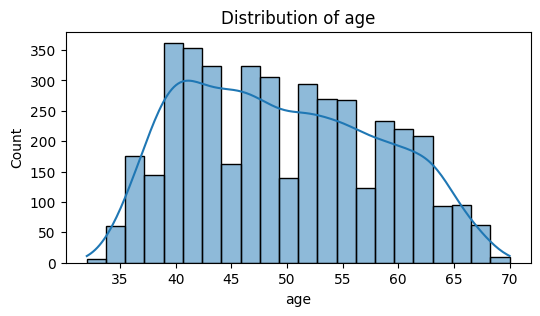

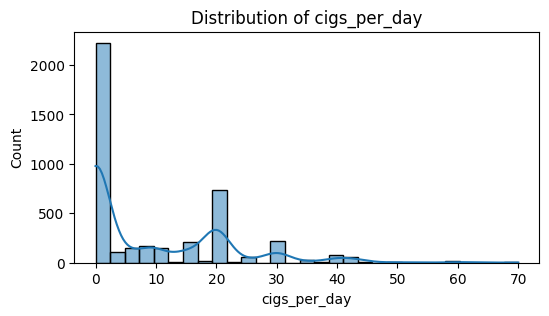

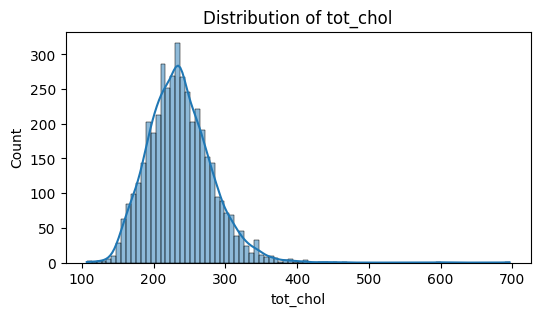

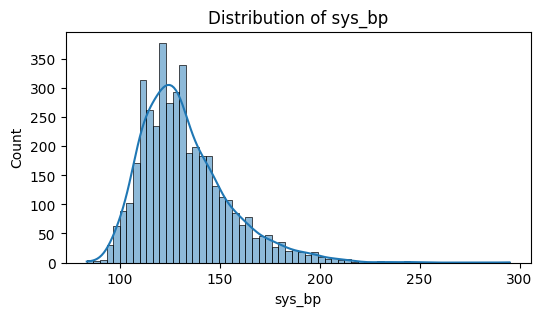

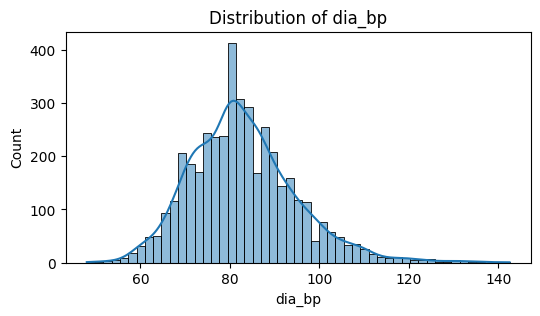

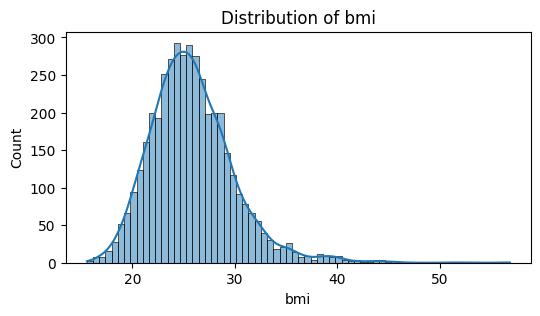

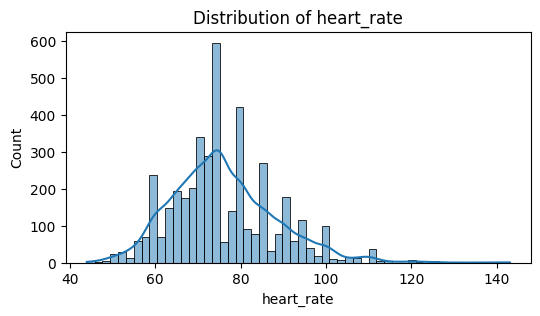

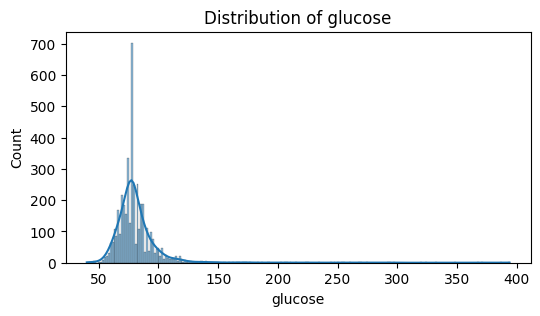

In [966]:
for col in df_numeric.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_numeric[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Data numerik kebanyakan distribusi normal, cek kemiringan data

In [967]:
df_numeric = df_numeric.astype(float)
skew_values = df_numeric.skew().sort_values(ascending=False)
print(skew_values)

glucose         6.545064
cigs_per_day    1.251386
sys_bp          1.145102
bmi             0.988371
tot_chol        0.881062
dia_bp          0.713762
heart_rate      0.631691
age             0.229483
dtype: float64


Transformasi data numerik yang memiliki nilai kemiringan > 0.5 menggunakan box-cox (positive), dan yeo-johnson (sisanya)

In [968]:
skewed_cols = df_numeric.skew().abs()
skewed_cols = skewed_cols[skewed_cols >= 0.5].index

positive_cols = [col for col in skewed_cols if (df_numeric[col] > 0).all()]
remaining_cols = [col for col in skewed_cols if col not in positive_cols]

ptbc = PowerTransformer(method='box-cox', standardize=True)
ptyj = PowerTransformer(method='yeo-johnson', standardize=True)

df_numeric[positive_cols] = ptbc.fit_transform(df_numeric[positive_cols].astype(float))
df_numeric[remaining_cols] = ptyj.fit_transform(df_numeric[remaining_cols].astype(float))
df = pd.concat([df_numeric, df.drop(columns=df_numeric)], axis=1)

skew_values = df_numeric.skew().sort_values(ascending=False)
print(skew_values)


age             0.229483
cigs_per_day    0.208928
sys_bp          0.011689
tot_chol       -0.000439
heart_rate     -0.001590
dia_bp         -0.006583
bmi            -0.012135
glucose        -0.246810
dtype: float64


In [969]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4232 entries, 0 to 4239
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           4232 non-null   float64 
 1   cigs_per_day  4232 non-null   float64 
 2   tot_chol      4232 non-null   float64 
 3   sys_bp        4232 non-null   float64 
 4   dia_bp        4232 non-null   float64 
 5   bmi           4232 non-null   float64 
 6   heart_rate    4232 non-null   float64 
 7   glucose       4232 non-null   float64 
 8   gender        4232 non-null   object  
 9   bp_meds       4232 non-null   int64   
 10  prev_stroke   4232 non-null   int64   
 11  prev_hyp      4232 non-null   int64   
 12  heart_att     4232 non-null   int64   
 13  diabetes      4232 non-null   category
dtypes: category(1), float64(8), int64(4), object(1)
memory usage: 467.1+ KB


<h5>- Transformasi Object/Category

Encoding gender menggunakan label 1 dan 0, dan diabetes dengan label 0, 1 dan 2 secara ordinal

In [970]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

encoder = OrdinalEncoder(categories=[['Normal', 'Pre-diabetes', 'Diabetes']])
df[['diabetes']] = encoder.fit_transform(df[['diabetes']])
df['diabetes'] = df['diabetes'].astype(int)


In [971]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4232 entries, 0 to 4239
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           4232 non-null   float64
 1   cigs_per_day  4232 non-null   float64
 2   tot_chol      4232 non-null   float64
 3   sys_bp        4232 non-null   float64
 4   dia_bp        4232 non-null   float64
 5   bmi           4232 non-null   float64
 6   heart_rate    4232 non-null   float64
 7   glucose       4232 non-null   float64
 8   gender        4232 non-null   int64  
 9   bp_meds       4232 non-null   int64  
 10  prev_stroke   4232 non-null   int64  
 11  prev_hyp      4232 non-null   int64  
 12  heart_att     4232 non-null   int64  
 13  diabetes      4232 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 495.9 KB


In [972]:
df

,age,cigs_per_day,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,gender,bp_meds,prev_stroke,prev_hyp,heart_att,diabetes
0,39.0,-0.947198,-0.958216,-1.469408,-1.142723,0.409895,0.434963,-0.075148,1,0,0,0,0,0
1,46.0,-0.947198,0.391261,-0.427070,-0.067615,0.807737,1.501892,-0.156768,0,0,0,0,0,0
2,48.0,1.146435,0.281713,-0.061717,-0.156788,0.003049,0.023044,-0.706003,1,0,0,0,0,0
3,61.0,1.323365,-0.180398,0.927549,1.039763,0.775344,-0.912834,1.403029,0,0,0,1,1,1
4,46.0,1.208889,1.100979,0.067701,0.191006,-0.628682,0.816265,0.495930,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,48.0,1.146435,0.347711,0.117886,-0.930485,-0.975583,0.742257,0.558418,0,0,0,0,0,0
4236,44.0,1.013166,-0.555206,-0.115128,0.437144,-2.013203,0.889207,0.003965,0,0,0,0,0,0
4237,52.0,-0.947198,0.788189,0.239585,0.106239,-1.152674,0.434963,1.555717,0,0,0,0,0,1
4238,40.0,-0.947198,-1.244762,0.575182,1.247913,0.070678,-0.712008,-0.510693,1,0,0,1,0,0


<h5>Training menggunakan Logistic Regression

Menggunakan SMOTE untuk resampling agar data balance, lalu men-standarized data dengan standar deviasi 0 dan mean 1 yang lebih baik untuk mempredict menggunakan method linear (logistic Regression), lalu hyperparameter tuning menggunakan grid search dengan parameter yang tertera.
Note: karena ada dua data yang identik (glucose dan diabetes), maka dalam kasus ini diabetes akan dihapus karena glucose yang berisi data numerik lebih bermakna dibanding diabetes ordinal jika menggunakan Logistic Regression

In [982]:
X = df.drop(columns=['heart_att', 'diabetes'])
y = df['heart_att']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Fitting 10 folds for each of 90 candidates, totalling 900 fits
Tuned Model CV Accuracy: 0.6703 ± 0.0189
Tuned Model Test Accuracy: 0.6525
Time to train: 3.4344 seconds
Time to predict: 0.0009267330169677734 seconds

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       749
           1       0.63      0.66      0.65       687

    accuracy                           0.65      1436
   macro avg       0.65      0.65      0.65      1436
weighted avg       0.65      0.65      0.65      1436



C:\Users\rizqy\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


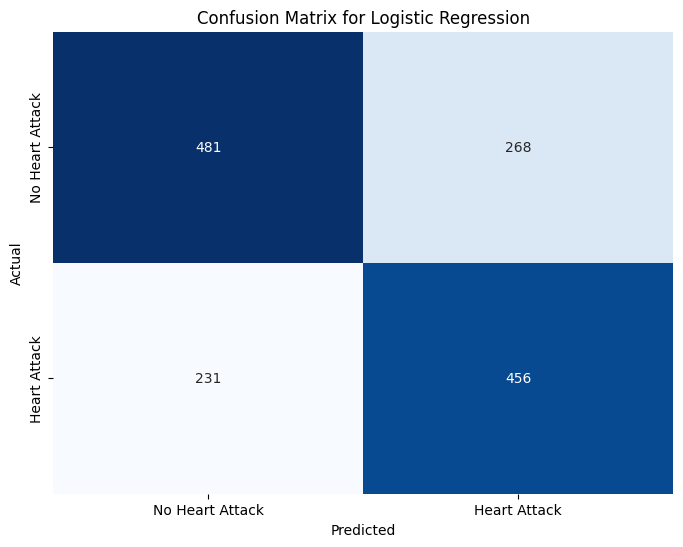

In [983]:
param_grid = [
    {
        'penalty': ['l1', 'l2', None],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
        'max_iter': [100, 500, 1000]
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],
        'max_iter': [100, 500, 1000],
        'l1_ratio': [0.3, 0.5, 0.7]
    }
]
start_tr = time.time()
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
end_tr = time.time()

cv_results = pd.DataFrame(grid_search.cv_results_)
best_index = grid_search.best_index_
std_dev = cv_results.loc[best_index, 'std_test_score']
mean_score = cv_results.loc[best_index, 'mean_test_score']
print(f'Tuned Model CV Accuracy: {mean_score:.4f} ± {std_dev:.4f}')

lr_tuned = mean_score

best_model = grid_search.best_estimator_
start_pr = time.time()
y_pred_tuned = best_model.predict(X_test)
end_pr = time.time()
print(f'Tuned Model Test Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}')

print(f'Time to train: {end_tr - start_tr:.4f} seconds')
print(f'Time to predict: {end_pr - start_pr} seconds')

print('\nClassification Report (Tuned Model):')
print(classification_report(y_test, y_pred_tuned))

cm_lg = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Heart Attack', 'Heart Attack'],
            yticklabels=['No Heart Attack', 'Heart Attack'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h5>Training menggunakan Random Forest

Menggunakan SMOTE untuk resampling agar data balance, lalu hyperparameter tuning menggunakan grid search dengan parameter yang tertera.
Note: karena ada dua data yang identik (glucose dan diabetes), maka dalam kasus ini glucose akan dihapus karena diabetes yang berisi data ordinal lebih bermakna dibanding glucose jika menggunakan Random Forest (tree)

In [975]:
X = df.drop(columns=['heart_att', 'diabetes'])
y = df['heart_att']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Tuned Model CV Accuracy: 0.8804 ± 0.0166
Tuned Model Test Accuracy: 0.8684
Time to train: 174.0870 seconds
Time to predict: 0.027000904083251953 seconds

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       749
           1       0.85      0.89      0.87       687

    accuracy                           0.87      1436
   macro avg       0.87      0.87      0.87      1436
weighted avg       0.87      0.87      0.87      1436



<Figure size 800x600 with 0 Axes>

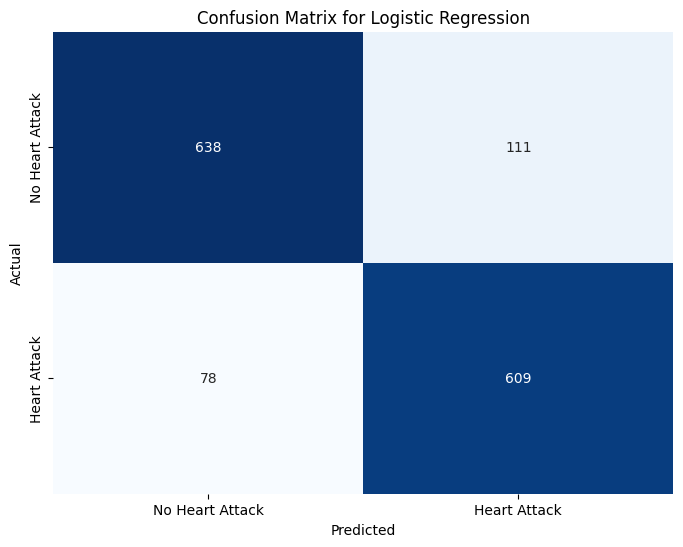

In [976]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
}

start_tr = time.time()
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
end_tr = time.time()

cv_results = pd.DataFrame(grid_search.cv_results_)
best_index = grid_search.best_index_
std_dev = cv_results.loc[best_index, 'std_test_score']
mean_score = cv_results.loc[best_index, 'mean_test_score']
print(f'Tuned Model CV Accuracy: {mean_score:.4f} ± {std_dev:.4f}')

rf_tuned = mean_score

best_model = grid_search.best_estimator_
start_pr = time.time()
y_pred_tuned = best_model.predict(X_test)
end_pr = time.time()
print(f'Tuned Model Test Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}')

print(f'Time to train: {end_tr - start_tr:.4f} seconds')
print(f'Time to predict: {end_pr - start_pr} seconds')

print('\nClassification Report (Tuned Model):')
print(classification_report(y_test, y_pred_tuned))

cm_rf = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Heart Attack', 'Heart Attack'],
            yticklabels=['No Heart Attack', 'Heart Attack'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()